# Modeling Clustering Examples

### This jupyter notebook contains examples of clustering using three different datasets: iris, mall, and tips.

## Set up Environment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import wrangle_mall
from pydataset import data
from sklearn.cluster import KMeans
from sklearn.cluster import dbscan

## Iris Dataset

In [2]:
iris = data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# fix column names into snake case
iris.columns = [c.lower().replace('.', '_') for c in iris]

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
X = iris[['sepal_length', 'sepal_width', 'petal_length']]
# Create (using the default 8 clusters)
kmeans = KMeans()
# Fit
kmeans.fit(X)
kmeans.predict(X)

array([1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 1,
       1, 4, 1, 4, 1, 4, 0, 0, 0, 7, 0, 2, 0, 6, 0, 7, 6, 7, 7, 2, 7, 0,
       2, 7, 2, 7, 2, 7, 2, 2, 0, 0, 0, 0, 2, 7, 7, 7, 7, 2, 7, 2, 0, 2,
       7, 7, 7, 2, 7, 6, 7, 7, 7, 2, 6, 7, 5, 2, 5, 5, 5, 3, 7, 3, 5, 3,
       0, 5, 5, 2, 2, 5, 5, 3, 3, 2, 5, 2, 3, 2, 5, 3, 2, 2, 5, 5, 3, 3,
       5, 2, 5, 3, 5, 5, 2, 5, 5, 0, 2, 5, 5, 5, 2, 5, 5, 2], dtype=int32)

In [7]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,sepal_length,sepal_width,petal_length
0,6.642857,3.050000,4.700000
1,5.242857,3.667857,1.500000
2,6.011538,2.773077,4.800000
3,7.540000,3.150000,6.390000
4,4.704545,3.122727,1.413636
5,6.579167,3.037500,5.591667
6,5.000000,2.300000,3.275000
7,5.618182,2.672727,4.036364


[Text(0.5, 0, 'sepal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

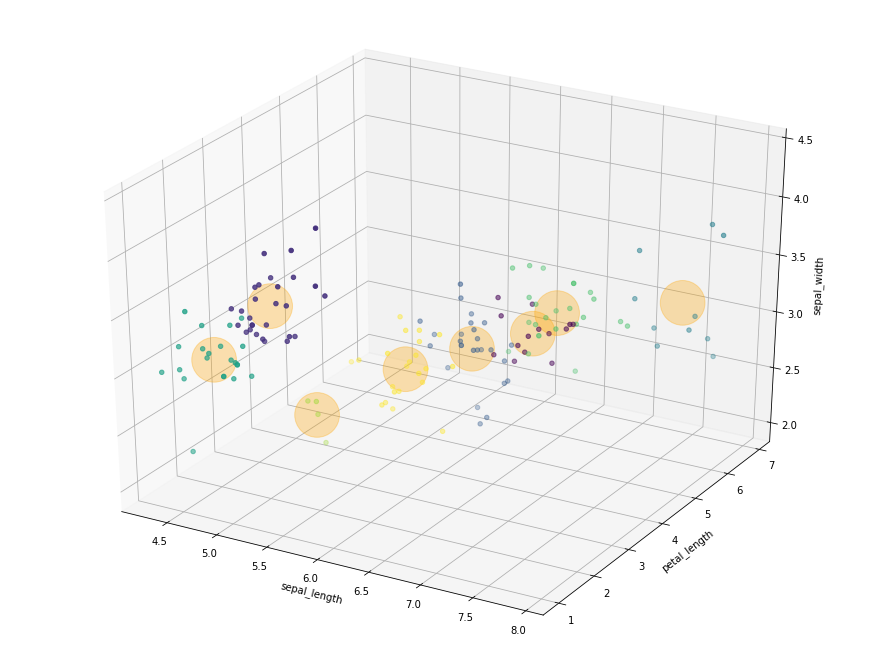

In [8]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.sepal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.sepal_width, c='orange', s=2000, alpha=.3)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='sepal_width')

#### - Takeaway: This is probably not an ideal number of clusters. Let's do the same thing, but with 4 clusters this time.

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 0, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,sepal_length,sepal_width,petal_length
0,6.292000,2.898000,4.940000
1,5.006000,3.428000,1.462000
2,5.532143,2.635714,3.960714
3,7.122727,3.113636,6.031818


[Text(0.5, 0, 'sepal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

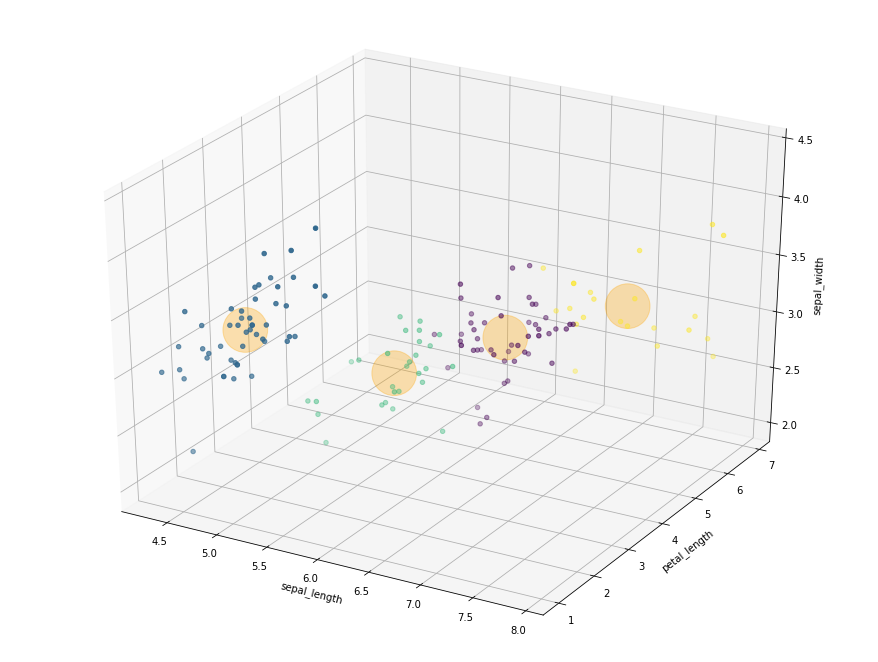

In [11]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.sepal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.sepal_width, c='orange', s=2000, alpha=.3)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='sepal_width')

#### - Takeaway: This looks let's better. Let's try again with 3 centroids since we have 3 specific species in our dataset. 

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [13]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,sepal_length,sepal_width,petal_length
0,5.006000,3.428000,1.462000
1,6.835714,3.064286,5.654762
2,5.846552,2.732759,4.363793


[Text(0.5, 0, 'sepal_width'),
 Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_length')]

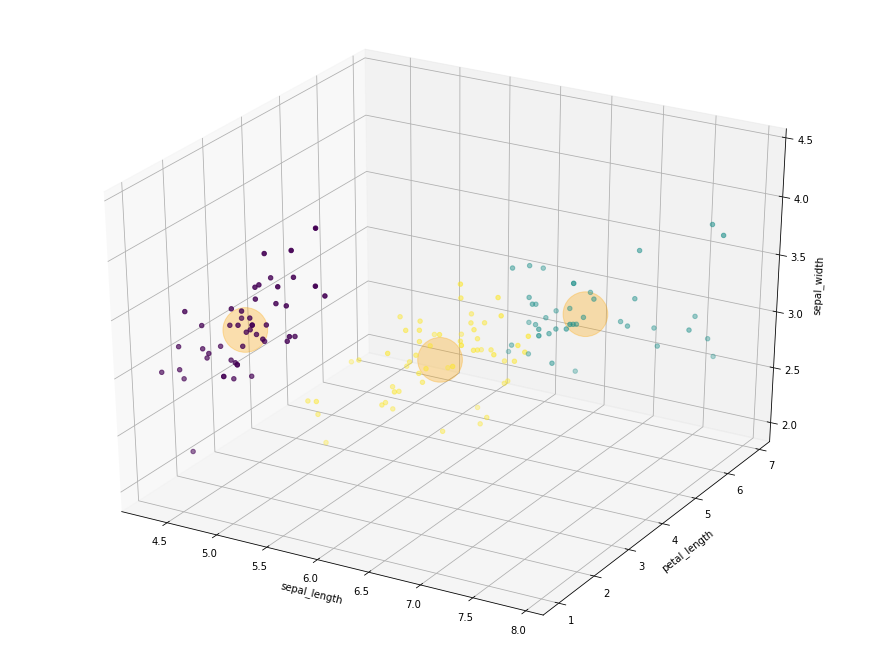

In [14]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(iris.sepal_length, iris.petal_length, iris.sepal_width, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.petal_length, centers.sepal_width, c='orange', s=2000, alpha=.3)
ax.set(xlabel='sepal_length', ylabel='petal_length', zlabel='sepal_width')

#### - Takeaway: This appears to be the optimal amounts of centroids.

Text(0, 0.5, 'inertia')

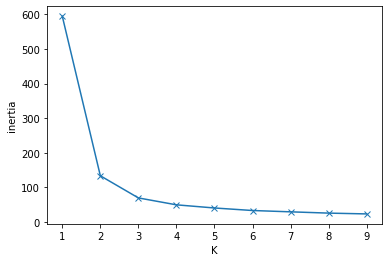

In [15]:
k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeans.inertia_)
    k_values.append(k)

plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

### DBSCAN Method with 2 Variables

- (Density-Based Spatial Clustering of Applications with Noise), captures the insight that clusters are dense groups of points. The idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

In [16]:
cores, labels = dbscan(X,eps=.5, min_samples=4)

In [17]:
X['clusters'] = labels
X.head()

,sepal_length,sepal_width,petal_length,clusters
1,5.1,3.5,1.4,0
2,4.9,3.0,1.4,0
3,4.7,3.2,1.3,0
4,4.6,3.1,1.5,0
5,5.0,3.6,1.4,0


In [18]:
# Function to visualize dbscan for iris dataset
def plot_dbscan(eps, minPts):
    cores, labels = dbscan(X, eps=eps, min_samples=minPts)
    X['cluster'] = labels

    for c in X.cluster.unique():
        subset = X[X.cluster == c]
        marker = 'x' if c == -1 else 'o'
        plt.scatter(subset.petal_length, subset.sepal_length, marker=marker, label=c, zorder=3)

    for i, p in X.iterrows():
        circle = plt.Circle((p.petal_length, p.sepal_length), eps, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
        plt.gca().add_patch(circle)

    plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
    plt.legend()


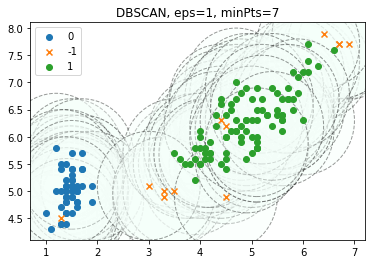

In [19]:
plot_dbscan(1,7)

## Mall Dataset

Use the mall dataset.

Perform clustering using annual income and spending score. Try out different values for k.
Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?
Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.

In [20]:
mall = wrangle_mall.get_mall_data()
mall.head(5)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# Delete customer_id column becuase it is not very useful. Let's also delete the gender column because its data type is a string.
mall = mall.drop(columns=['customer_id', 'gender'])
mall.head(5)

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


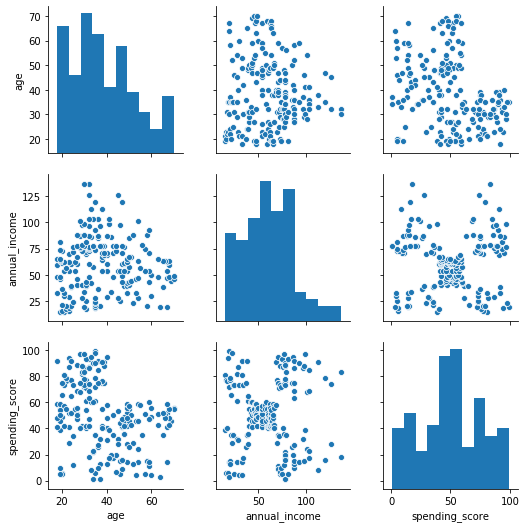

In [22]:
sns.pairplot(mall)

In [23]:
X = mall[['annual_income', 'spending_score']]

In [24]:
# Create and fit
kmeans = KMeans(n_clusters = 5).fit(X)
# Predict
kmeans.predict(X)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [25]:
mall['cluster'] = kmeans.labels_

In [26]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,annual_income,spending_score
0,25.727273,79.363636
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,26.304348,20.913043


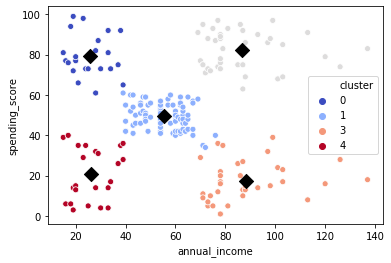

In [27]:
sns.scatterplot(x='annual_income', y= 'spending_score', data = mall, hue='cluster', palette = 'coolwarm')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='D', s=100, c='black')

In [28]:
mall.groupby('cluster').mean()

,age,annual_income,spending_score
cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


### DBSCAN Method with 2 Variables

In [29]:
cores, labels = dbscan(X,eps=.7, min_samples=3)

In [30]:
X['clusters'] = labels
X.head()

,annual_income,spending_score,clusters
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1


In [31]:
# Function to visualize dbscan for mall dataset
def plot_dbscan(eps, minPts):
    cores, labels = dbscan(X, eps=eps, min_samples=minPts)
    X['cluster'] = labels

    for c in X.cluster.unique():
        subset = X[X.cluster == c]
        marker = 'x' if c == -1 else 'o'
        plt.scatter(subset.annual_income, subset.spending_score, marker=marker, label=c, zorder=3)

    for i, p in X.iterrows():
        circle = plt.Circle((p.annual_income, p.spending_score), eps, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
        plt.gca().add_patch(circle)

    plt.title(f'DBSCAN, eps={eps}, minPts={minPts}')
    plt.legend()


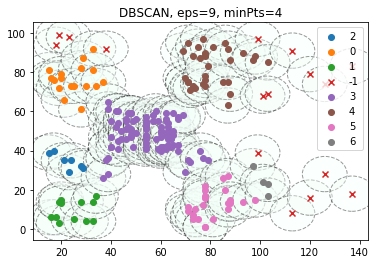

In [32]:
plot_dbscan(9,4)

### Using three variables now 

In [33]:
X = mall[['age','annual_income', 'spending_score']]

In [34]:
# Create and fit
kmeans = KMeans(n_clusters = 5).fit(X)
# Predict
kmeans.predict(X)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [35]:
mall['cluster'] = kmeans.labels_

In [36]:
# Check for the coordinates of the centroids
centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers

,age,annual_income,spending_score
0,43.088608,55.291139,49.569620
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.521739,26.304348,78.565217


[Text(0.5, 0, 'spending_score'),
 Text(0.5, 0, 'annual_income'),
 Text(0.5, 0, 'age')]

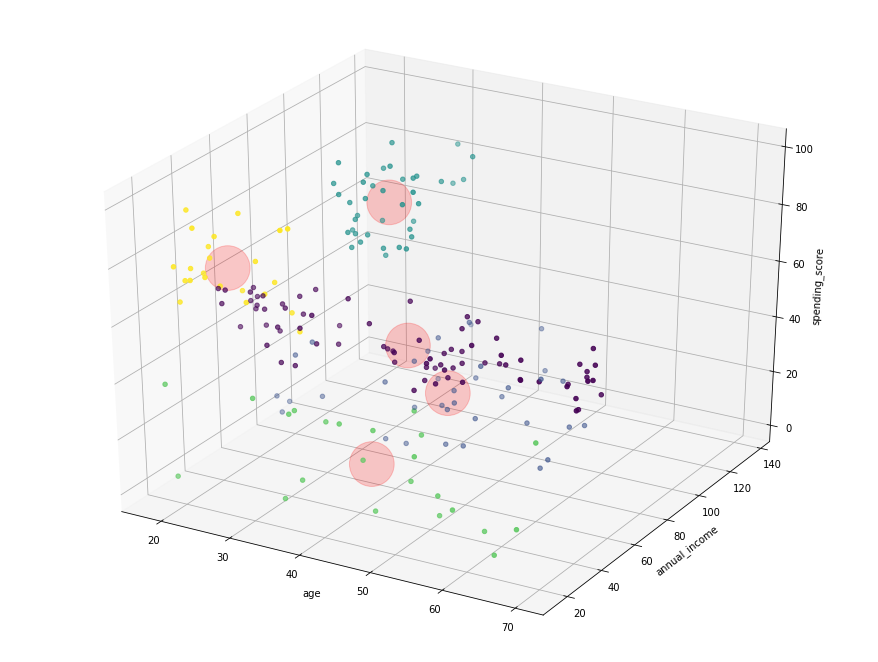

In [37]:
# Visualize the data
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(X.age, X.annual_income, X.spending_score, c=kmeans.labels_)
ax.scatter(centers.age, centers.annual_income, centers.spending_score, c='red', s=2000, alpha=.2)
ax.set(xlabel='age', ylabel='annual_income', zlabel='spending_score')

## Tips

Load the tips dataset

Perform k-means clustering with tip and total_bill. Try a k of 2 and a k of 3. Visualize the resulting clusters.
Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.
Use the resulting clusters to explore your dataset. What is the average party size for each cluster? How many smokers vs non smokers are in each cluster? Is this different than in the overall population?